<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/Week_3/demo_ANN_CustomerChurn_train_test_S_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/Churn_Modelling.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.groupby(by='Geography').count()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,,,
France,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014
Germany,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
Spain,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477


In [9]:
X = df.iloc[:, 3:13].values # inputs
y = df.iloc[:, 13].values # output

In [10]:
# khach hang ra di
exited = np.count_nonzero(y)
exited

2037

In [11]:
# khach hang o lai
no_exited = y.shape[0] - exited
no_exited

7963

In [12]:
from scipy.stats import itemfreq
# khach hang o lai/ra di
itemfreq(y)

array([[   0, 7963],
       [   1, 2037]])

In [13]:
# in thong tin 10 khach hang dau tien
X[:10]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [14]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
ct = ColumnTransformer([('encoder', OneHotEncoder(), [1])],
 remainder='passthrough')
X = ct.fit_transform(X.tolist())
# save 3 model nay pickle: labelencoder_X_1, labelencoder_X_2, ct
# Save the Modle to file in the current working directory
# Pkl_Filename = "Pickle_RL_Model.pkl"
# with open(Pkl_Filename, 'wb') as file:
# pickle.dump(Model, file)
# Load the Model back from file
# with open(Pkl_Filename, 'rb') as file:
# model_load = pickle.load(file)

X[:10]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [1.0, 0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [0.0, 1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [1.0, 0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [15]:
# vì chỉ có 3 quốc gia, nên khi tạo ra ma trận OneHotEncoder quốc gia sẽ như sau:
# France 1, 0, 0
# Germany 0, 1, 0
# Spain 0, 0, 1
# => Theo đó có thể bỏ đi 1 cột đầu thì 2 cột sau là đủ thể hiện mã của 3 quốc gi
# France 0, 0
# Germany 1, 0
# Spain 0, 1
X = X[:, 1:]

In [16]:
X[:10]

array([[0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [17]:
# scale truoc => split sau
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
import pickle
scalerfile = 'sc.sav'
pickle.dump(sc, open(scalerfile, 'wb'))
# Hoac lam 1 pipeline: Lable Encoder => OnhotEncoder => Stadard scaler => model p
# o noi khac: goi model pre 

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
X_train[:5]

array([[-0.57873591,  1.74273971,  0.17042381, -1.09598752, -0.4693113 ,
        -0.00442596, -1.22584767,  0.80773656,  0.64609167, -1.03067011,
         1.10838187],
       [ 1.72790383, -0.57380915, -2.31280236,  0.91241915,  0.29351742,
        -1.38753759, -0.01289171, -0.91158349,  0.64609167,  0.97024255,
        -0.74759209],
       [-0.57873591, -0.57380915, -1.19535058, -1.09598752, -0.94607926,
        -1.04175968,  0.57507592, -0.91158349,  0.64609167, -1.03067011,
         1.48746417],
       [-0.57873591,  1.74273971,  0.03591573,  0.91241915,  0.10281024,
        -0.00442596,  0.46795537, -0.91158349,  0.64609167, -1.03067011,
         1.27855845],
       [-0.57873591,  1.74273971,  2.06388377, -1.09598752,  1.72382128,
         1.03290776,  0.80600989,  0.80773656,  0.64609167,  0.97024255,
         0.56006929]])

In [24]:
X_train[0].shape

(11,)


###Xây dựng model ANN

In [26]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

In [27]:
# Intitialing the ANN
classifier = Sequential()

* Khởi tạo ANN sử dụng keras Sequential class và đặt tên là classifier.
* Tạo một Dense input layer với output_dim là 6 (11 inputs + 1 output )/2, hoặc 12 (11+1). Không có một quy tắc nghiêm ngặt nào cho giá trị này,
* activation function: ‘relu’ (thường được áp dụng cho input layer và các hidden network layers)
* input_shape = (11,) (có independent input variables trong X matrix)
* => => add vào hidden layer sử dụng classifier.add()

In [28]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, activation='relu', input_shape=(11,)))
classifier.add(Dropout(rate=0.1))

* Tạo Dense hidden layer tiếp theo với cùng tham số mà không cần input_dim (chỉ cần khai báo input_dim ở input layer) => add vào hidden layer sử dụng classifier.add()

In [29]:
# Addding the second hidden layer
# lop truoc do da co output => input cua lop sau
classifier.add(Dense(units = 6,
 activation='relu'))
classifier.add(Dropout(rate=0.1))

* Tạo output layer với output_dim = 1 và sigmoid activation function (kết quả chỉ có 1) => add
vào network sử dụng classifier.add().

In [30]:
# Adding the output layer
classifier.add(Dense(units = 1,
 activation='sigmoid')) # like logistic regression

* Compile neural network sử dụng ‘adam’ optimizer, ‘binary_crossentropy’ loss function cho
accuracy metrics

In [32]:
#compiling ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


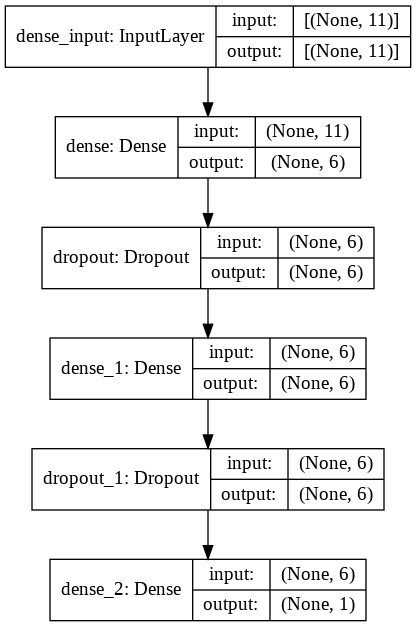

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(classifier, to_file='ANN_model.png', show_shapes=True)

##Cách tính params: fully connected: Param # = input * output +
output
* dense_input: Input layer: shape(None, 11), Param #=0
* dense:Dense: shape(?, 6), Param # = input * output + output = 11 * 6 + 6 = 72
* dense_1:Dense: shape(?, 6), Param # = input * output + output = 6 * 6 + 6 = 42
* dense_2:Dense: shape(?, 6), Param # = input * output + output = 6 * 1 + 1 = 7

In [39]:
# Fitting classifier to the Training set
history = classifier.fit(X_train, y_train, epochs = 100, batch_size=64, validation_data=(X_test, y_test)) # default batch size

Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.6050 - accuracy: 0.7041 - val_loss: 0.5293 - val_accuracy: 0.7620
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.7846 - val_loss: 0.4850 - val_accuracy: 0.7915
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7943 - val_loss: 0.4649 - val_accuracy: 0.7945
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7950 - val_loss: 0.4544 - val_accuracy: 0.7950
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7971 - val_loss: 0.4476 - val_accuracy: 0.7935
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.7977 - val_loss: 0.4420 - val_accuracy: 0.7940
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.7975 - val_loss: 0.4377 - val_accuracy: 0.7985

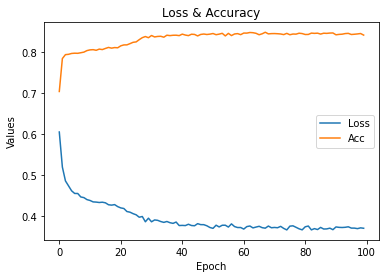

In [40]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Loss & Accuracy')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Acc'])
plt.show()

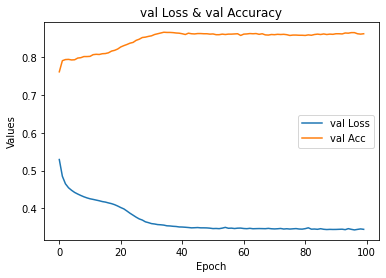

In [41]:
plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('val Loss & val Accuracy')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['val Loss', 'val Acc'])
plt.show()

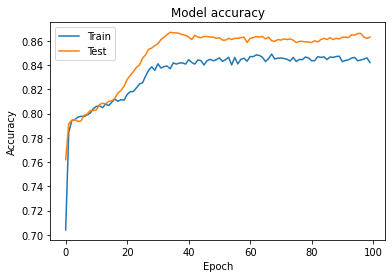

In [42]:
# so sanh acc giua train vs test: overfitting? underfitting? => No
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [43]:
# Part 3: Making a predictions and evaluating the models
# Predicting the Test set results
y_pred = classifier.predict(X_test)

##Đánh giá model và dự đoán dữ liệu mới

In [44]:
y_pred[:5]

array([[0.26352552],
       [0.34122443],
       [0.1810363 ],
       [0.09566706],
       [0.09164429]], dtype=float32)

In [45]:
# trên 0.5 => 1, ngược lại => 0
y_pred = y_pred >= 0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1532,   63],
       [ 211,  194]])

In [47]:
acc = (cm[0][0] + cm[1][1])/ (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0])
acc

0.863

In [49]:
#Evaluation
print("Accuracy:", classifier.evaluate(X_test, y_test))

63/63 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.8630
Accuracy: [0.3440905809402466, 0.8629999756813049]


In [50]:
#Save the result
from tensorflow.keras.models import load_model
# Creates a HDF5 file 'my_model.h5'
classifier.save('ANN_model.h5')

Use our ANN model to predict if the customer with the following informations will leave the
bank:
* Geography: France
* Credit Score: 600
* Gender: Male
* Age: 40 years old
* Tenure: 3 years
* Balance: 60000
* Number of Products: 2
* Does this customer have a credit card ? Yes
* Is this customer an Active Member: Yes
* Estimated Salary: 50000
* So should we say goodbye to that customer ?

In [51]:
new_pred = classifier.predict(sc.transform(np.array([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_pred = new_pred > 0.5
new_pred

array([[False]])

**the customer doesn't leave the bank**